In [ ]:
"""
Data scraping from wikipedia, some data wrangling, and simple matplotlib visualisations.
Data consists of financial iformation from Wikipedia Foundation.
Data will have to be cleaned and changed into numeric values to be visualised.
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"

tables = pd.read_html(url)

In [3]:
data = tables[0]

In [4]:
data.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2020/2021,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1,2019/2020,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2,2018/2019,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
3,2017/2018,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
4,2016/2017,PDF,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"


In [5]:
data.dtypes #checking datatypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

In [6]:
data.isna().any() #checking for missing values in data

Year            False
Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

In [7]:
del data["Source"]

In [8]:
data["Year"] = data["Year"].str[-4:]

In [9]:
data["Year"] = pd.to_numeric(data["Year"])

In [10]:
data.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1,2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2,2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
3,2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
4,2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"


In [11]:
data.set_index("Year", inplace=True)

In [12]:
data.sort_index(inplace=True)

In [13]:
data.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2004,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
2005,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
2006,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216"
2007,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282"
2008,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168"


In [14]:
data["Revenue"] = pd.to_numeric(data["Revenue"].str[2:].str.replace(",",""))
data["Expenses"] = pd.to_numeric(data["Expenses"].str[2:].str.replace(",",""))
data["Asset rise"] = pd.to_numeric(data["Asset rise"].str[2:].str.replace(",",""))
data["Total assets"] = pd.to_numeric(data["Total assets"].str[2:].str.replace(",",""))

In [26]:
data.head

<bound method NDFrame.head of         Revenue   Expenses  Asset rise  Total assets
Year                                                
2004      80129      23463       56666         56666
2005     379088     177670      211418        268084
2006    1508039     791907      736132       1004216
2007    2734909    2077843      654066       1658282
2008    5032981    3540724     3519886       5178168
2009    8658006    5617236     3053599       8231767
2010   17979312   10266793     6310964      14542731
2011   24785092   17889794     9649413      24192144
2012   38479665   29260652    10736914      34929058
2013   48635408   35704796    10260066      45189124
2014   52465287   45900745     8285897      53475021
2015   75797223   52596782    24345277      77820298
2016   81862724   65947465    13962497      91782795
2017   91242418   69136758    21547402     113330197
2018  104505783   81442265    21619373     134949570
2019  120067266   91414010    30691855     165641425
2020  129234327 

In [16]:
data.dtypes

Revenue         int64
Expenses        int64
Asset rise      int64
Total assets    int64
dtype: object

<AxesSubplot:title={'center':'Wikipedia Foundation Foundraising Statistics'}, xlabel='Year', ylabel='1 = $100M'>

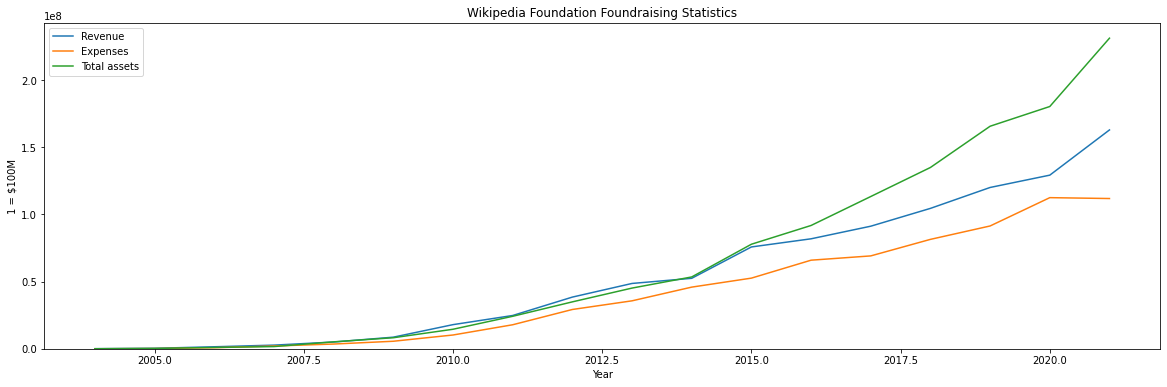

In [32]:
data[["Revenue", "Expenses", "Total assets"]].plot(title="Wikipedia Foundation Foundraising Statistics", ylabel="1 = $100M", ylim=0, figsize=(20,6))

<AxesSubplot:title={'center':'Wikipedia Foundation Asset rise'}, xlabel='Year', ylabel='1 = $100M'>

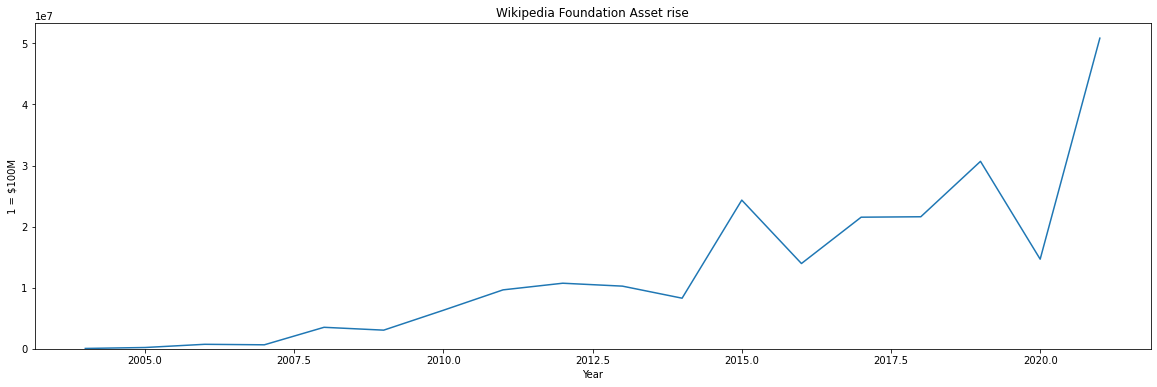

In [33]:
data["Asset rise"].plot(title="Wikipedia Foundation Asset rise", ylabel="1 = $100M", ylim=0, figsize=(20,6))

<AxesSubplot:title={'center':'Wikipedia Foundation Foundraising Statistics'}, xlabel='Year', ylabel='1 = $100M'>

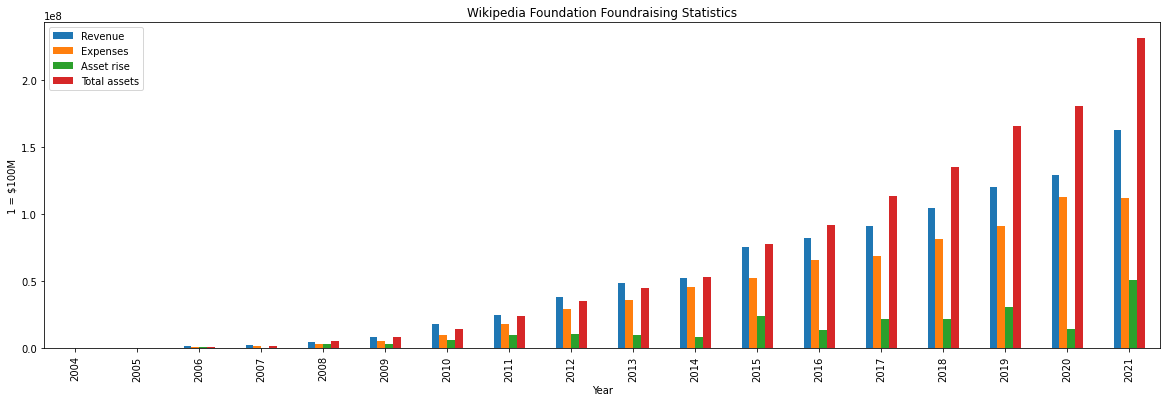

In [35]:
data.plot.bar(title="Wikipedia Foundation Foundraising Statistics", ylabel="1 = $100M", ylim=0, figsize=(20,6))